Importing the modules

# Welcome to the notebook 🙂

### Task 1 - Importing the Dataset

In [ ]:
import numpy as np
import pandas as pd

# Importing neural network modules
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
# Importing some machine learning modules
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Import data visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

print("Modules are imported!")

Modules are imported!


Importing the data

In [ ]:
data = pd.read_csv("Creditcard_dataset.csv")
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
1     7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
2    10  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152 -1.423236   
3    10  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
4    11  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
1 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
2  0.048456 -1.720408  ... -0.009302  0.313894  0.027740  0.500512  0.251367   
3  0.538247 -0.558895  ...  0.049924  0.238422  0.009130  0.996710 -0.767315   
4  0.115982 -0.221083  ... -0.036876  0.074412 -0.071407  0.104744  0.548265   

        V26       V27       V28  Amount  Class  
0 -0.221929  0.062723  0.061458  123.50      0  
1 -0.051634 -1.206921 -1.085339   40.80      0  
2 -0.129478  0.042850  0.016253    7.80      0  
3 -0.492208  0.042472 -0.054337    9.99      0  
4  0.104094  0.021491  0.021293   27.50      0  

[5 rows x 31 columns]

Check the data shape

In [ ]:
data.shape

(50492, 31)

Let's see how many genuine and limited fraudulent records we have

In [ ]:
data.Class.value_counts()

0    50000
1      492
Name: Class, dtype: int64

### Task 2 - Data Preprocessing and Exploration

*   Removing all the rows with `Nan` values
*   Removing `Time` column
*   Feature Scaling `Amount` column
*   Split the data into features and labels
*   Data Exploration


Removing the rows `Nan` values in the dataset

In [ ]:
data.dropna(inplace=True)
data.shape

(50492, 31)

Removing Time column

In [ ]:
data = data.drop(axis = 1, columns= 'Time')
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
1 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
2  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152 -1.423236   
3  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
4  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
1 -3.807864  0.615375  1.249376  ...  1.943465 -1.015455  0.057504 -0.649709   
2  0.048456 -1.720408  1.626659  ... -0.009302  0.313894  0.027740  0.500512   
3  0.538247 -0.558895  0.309755  ...  0.049924  0.238422  0.009130  0.996710   
4  0.115982 -0.221083  0.460230  ... -0.036876  0.074412 -0.071407  0.104744   

        V25       V26       V27       V28  Amount  Class  
0  0.647376 -0.221929  0.062723  0.061458  123.50      0  
1 -0.415267 -0.051634 -1.206921 -1.085339   40.80      0  
2  0.251367 -0.129478  0.042850  0.016253    7.80      0  
3 -0.767315 -0.492208  0.042472 -0.054337    9.99      0  
4  0.548265  0.104094  0.021491  0.021293   27.50      0  

[5 rows x 30 columns]

Feature Scaling of Amount column

In [ ]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
1 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
2  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152 -1.423236   
3  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
4  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
1 -3.807864  0.615375  1.249376  ...  1.943465 -1.015455  0.057504 -0.649709   
2  0.048456 -1.720408  1.626659  ... -0.009302  0.313894  0.027740  0.500512   
3  0.538247 -0.558895  0.309755  ...  0.049924  0.238422  0.009130  0.996710   
4  0.115982 -0.221083  0.460230  ... -0.036876  0.074412 -0.071407  0.104744   

        V25       V26       V27       V28    Amount  Class  
0  0.647376 -0.221929  0.062723  0.061458  0.150105      0  
1 -0.415267 -0.051634 -1.206921 -1.085339 -0.199848      0  
2  0.251367 -0.129478  0.042850  0.016253 -0.339490      0  
3 -0.767315 -0.492208  0.042472 -0.054337 -0.330223      0  
4  0.548265  0.104094  0.021491  0.021293 -0.256128      0  

[5 rows x 30 columns]

Let's split the genuine and fraud records into separate dataframes

In [ ]:
data_fraud = data[data.Class==1]
data_genuine = data[data.Class==0]
print(len(data_fraud), len(data_genuine))

492 50000


In [ ]:
data_genuine.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
1 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
2  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152 -1.423236   
3  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
4  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
1 -3.807864  0.615375  1.249376  ...  1.943465 -1.015455  0.057504 -0.649709   
2  0.048456 -1.720408  1.626659  ... -0.009302  0.313894  0.027740  0.500512   
3  0.538247 -0.558895  0.309755  ...  0.049924  0.238422  0.009130  0.996710   
4  0.115982 -0.221083  0.460230  ... -0.036876  0.074412 -0.071407  0.104744   

        V25       V26       V27       V28    Amount  Class  
0  0.647376 -0.221929  0.062723  0.061458  0.150105      0  
1 -0.415267 -0.051634 -1.206921 -1.085339 -0.199848      0  
2  0.251367 -0.129478  0.042850  0.016253 -0.339490      0  
3 -0.767315 -0.492208  0.042472 -0.054337 -0.330223      0  
4  0.548265  0.104094  0.021491  0.021293 -0.256128      0  

[5 rows x 30 columns]

Split the data into features and labels

In [ ]:
X = data.drop("Class", axis = 1)
y = data.Class

Data Exploration
  - Apply PCA to reduce the dimensionality of features `X` into two dimensions
  - Use a scatter plot to visualize our data

In [ ]:
pca = PCA(2)
transformed_data = pca.fit_transform(X)
df = pd.DataFrame(transformed_data)
df['label'] = y
df

0         1  label
0      -0.447839  1.197503      0
1      -0.582392  0.257884      0
2      -0.939388 -0.728438      0
3      -0.630768 -0.499047      0
4      -0.536287 -1.055365      0
...          ...       ...    ...
50487  10.855748 -2.787028      1
50488   6.927754 -4.949749      1
50489   7.038191 -2.785053      1
50490  11.649175 -1.991456      1
50491  -0.227983 -2.009682      1

[50492 rows x 3 columns]

Let's Use a scatter plot to visualize our data

In [ ]:
px.scatter(df, x=0, y=1, color = df.label.astype(str))

### Task 3 - Building the Generator Model

Write a method to create the Generator model architecture

In [ ]:
def build_generator():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_dim= 29, kernel_initializer= 'he_uniform'))
  model.add(BatchNormalization())

  model.add(Dense(64,activation = 'relu'))
  model.add(BatchNormalization())

  model.add(Dense(128,activation = 'relu'))
  model.add(BatchNormalization())

  model.add(Dense(29, activation = 'linear'))

  model.summary()

  return model

build_generator()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                960       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_2 (Bat  (None, 128)               5

### Task 4 - Building the Discriminator Model

Write a method to create the Discriminator model architecture

In [ ]:
def build_discriminator():
  model = Sequential()

  model.add(Dense(128, input_dim=29, activation = 'relu', kernel_initializer = 'he_uniform'))

  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))

  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

  model.summary()
  return model

build_discriminator()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3840      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 15777 (61.63 KB)
Trainable params: 15777

### Task 5 - Combine Generator and Discriminator models to Build The GAN

In [ ]:
def build_gan(generator, discriminator):
  discriminator.trainable = False
  gan_input = Input(shape=(generator.input_shape[1],))
  x = generator(gan_input)
  gan_output = discriminator(x)

  gan = Model(gan_input, gan_output)
  gan.summary()
  return gan

Let's create a method that generates synthetic data using the Generator

In [ ]:
def generate_synthetic_data(generator, num_samples):
  noise = np.random.normal(0, 1, (num_samples, generator.input_shape[1]))
  fake_data = generator.predict(noise)
  return fake_data

### Task 6 - Train and evaluate our GAN
*    Defining some variables
*    Creating our GAN
*    Training the GAN
*    Monitor the GAN performance using PCA




In [ ]:
def monitor_generator(generator):
    # Initialize a PCA (Principal Component Analysis) object with 2 components
    pca = PCA(n_components=2)

    # Drop the 'Class' column from the fraud dataset to get real data
    real_fraud_data = data_fraud.drop("Class", axis=1)

    # Transform the real fraud data using PCA
    transformed_data_real = pca.fit_transform(real_fraud_data.values)

    # Create a DataFrame for the transformed real data and add a 'label' column with the value 'real'
    df_real = pd.DataFrame(transformed_data_real)
    df_real['label'] = "real"

    # Generate synthetic fraud data using the provided generator and specify the number of samples (492 in this case)
    synthetic_fraud_data = generate_synthetic_data(generator, 492)

    # Transform the synthetic fraud data using PCA
    transformed_data_fake = pca.fit_transform(synthetic_fraud_data)

    # Create a DataFrame for the transformed fake data and add a 'label' column with the value 'fake'
    df_fake = pd.DataFrame(transformed_data_fake)
    df_fake['label'] = "fake"

    # Concatenate the real and fake data DataFrames
    df_combined = pd.concat([df_real, df_fake])

    # Create a scatterplot to visualize the data points, using the first and second PCA components as x and y, respectively,
    # and color points based on the 'label' column, with a size of 10
    plt.figure()
    sns.scatterplot(data=df_combined, x=0, y=1, hue='label', s=10)
    plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                960       
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_5 (Bat  (None, 128)              

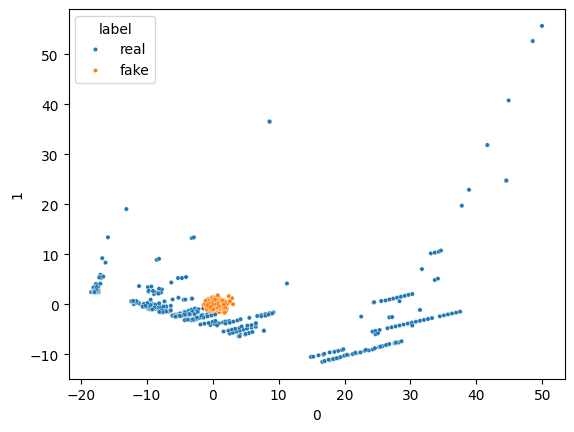

16/16 [==============================] - 0s 3ms/step


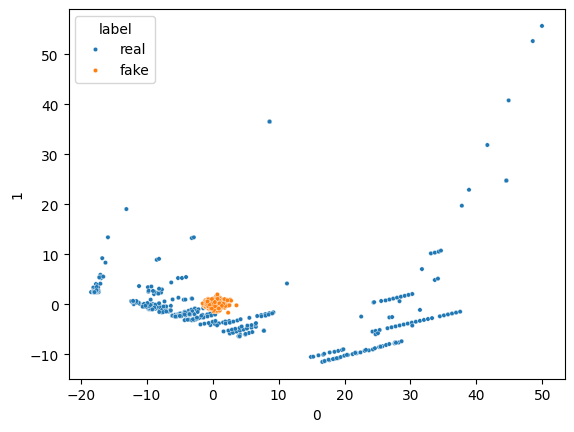

16/16 [==============================] - 0s 2ms/step


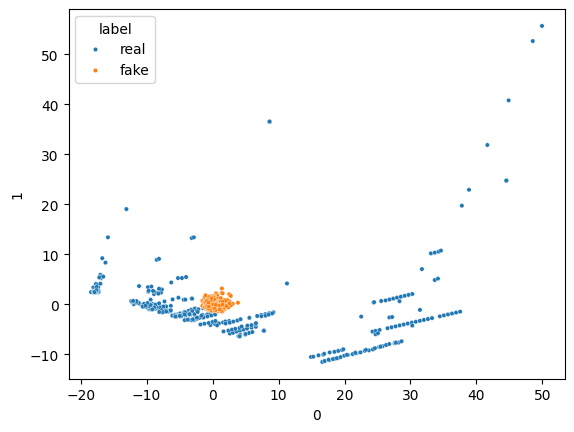

16/16 [==============================] - 0s 2ms/step


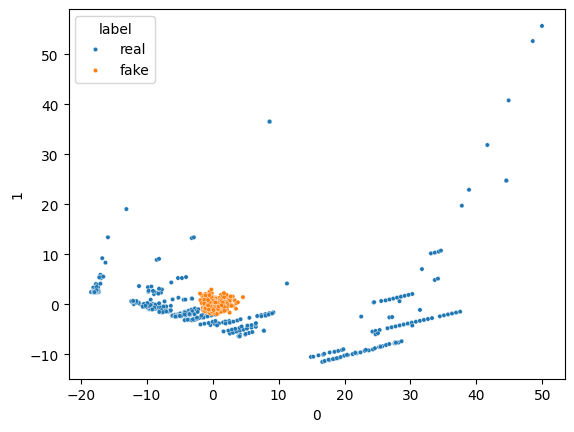

16/16 [==============================] - 0s 2ms/step


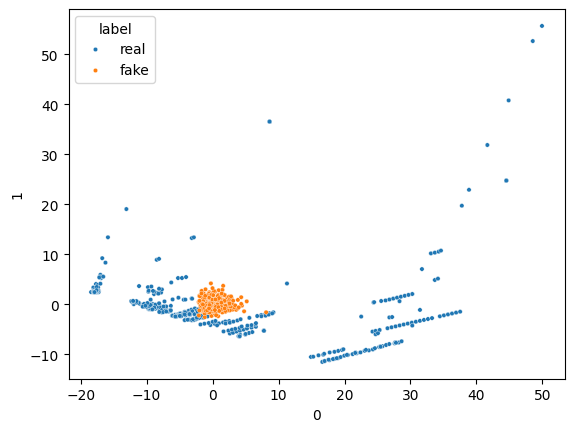

16/16 [==============================] - 0s 2ms/step


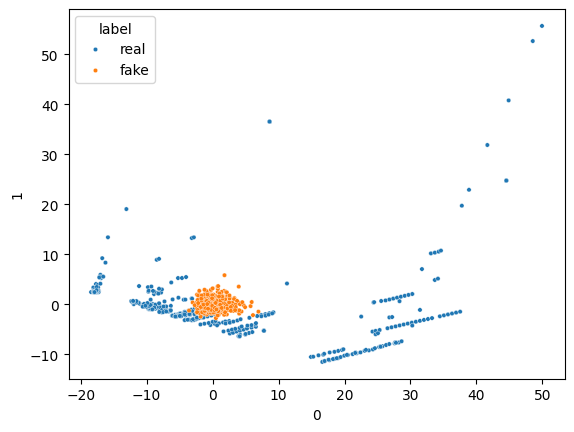

16/16 [==============================] - 0s 2ms/step


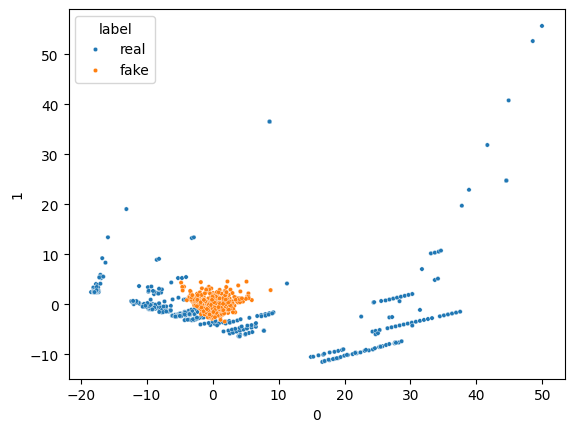

16/16 [==============================] - 0s 2ms/step


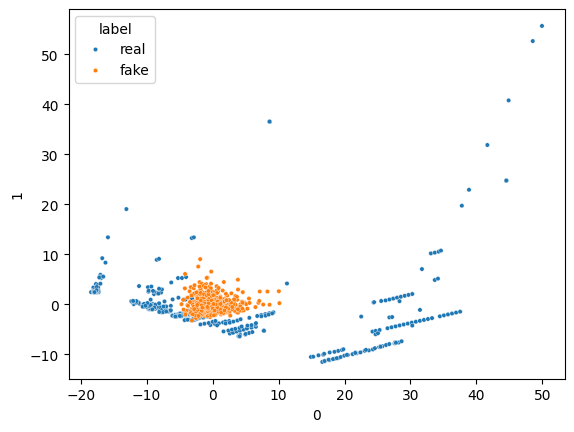

16/16 [==============================] - 0s 2ms/step


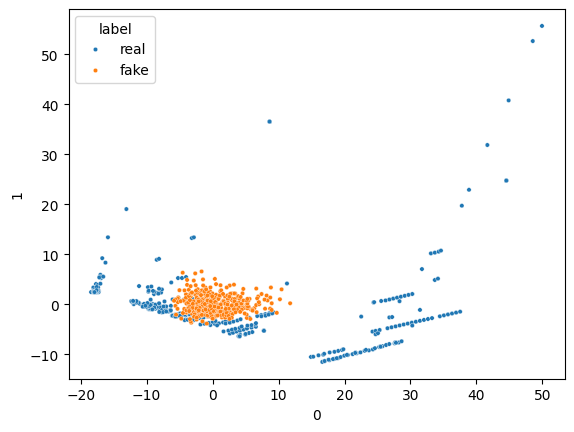

16/16 [==============================] - 0s 3ms/step


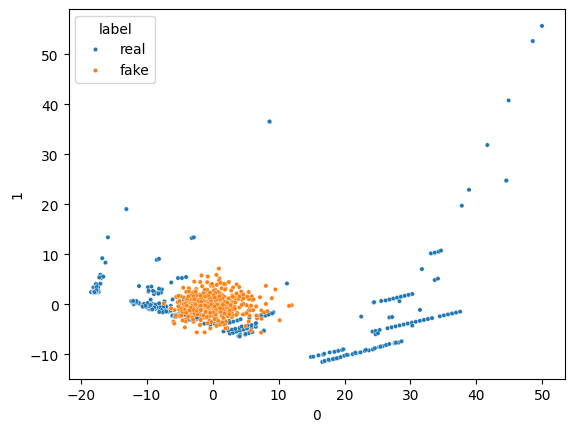

16/16 [==============================] - 0s 2ms/step


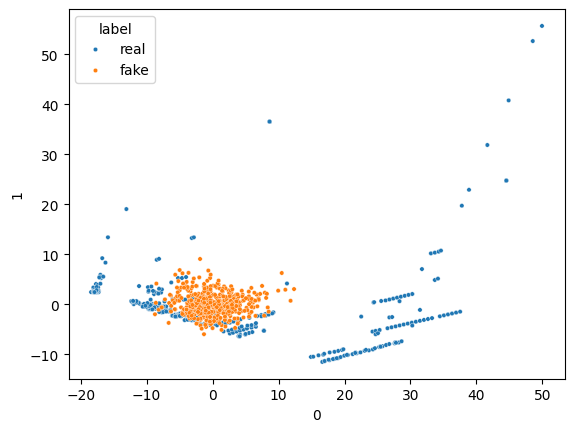

16/16 [==============================] - 0s 3ms/step


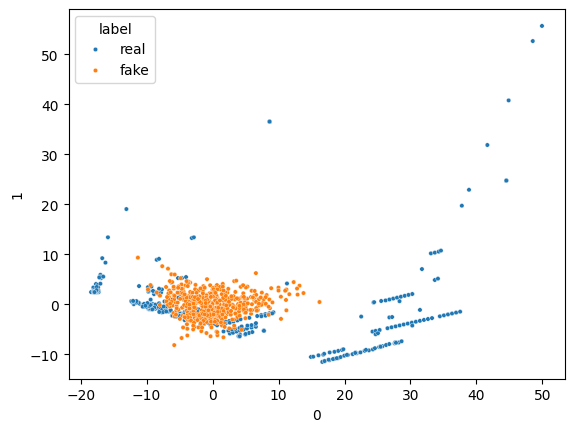

16/16 [==============================] - 0s 4ms/step


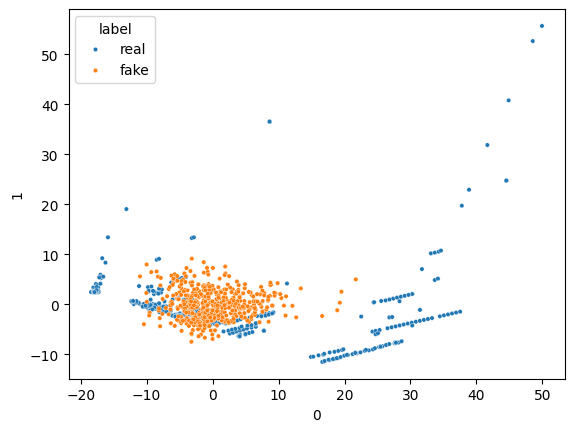

16/16 [==============================] - 0s 3ms/step


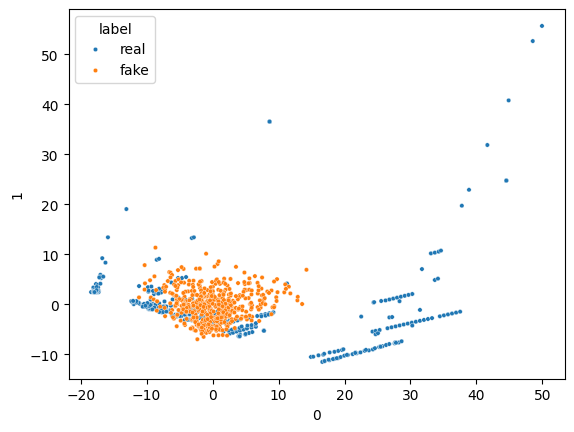

16/16 [==============================] - 0s 4ms/step


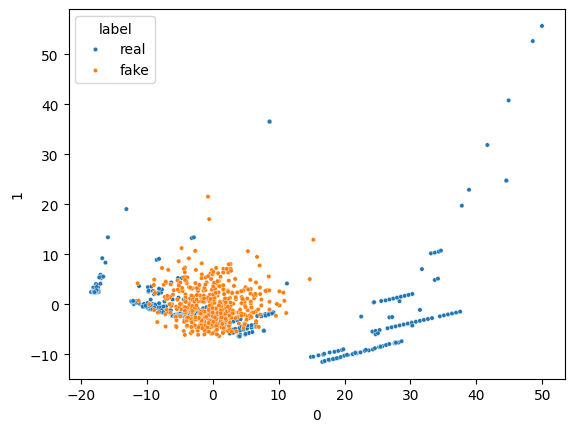

16/16 [==============================] - 0s 4ms/step


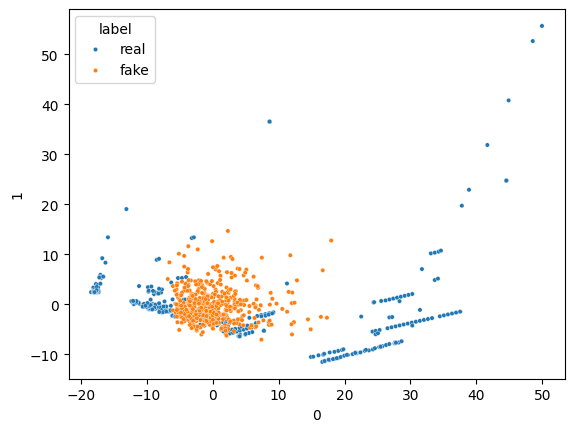

16/16 [==============================] - 0s 2ms/step


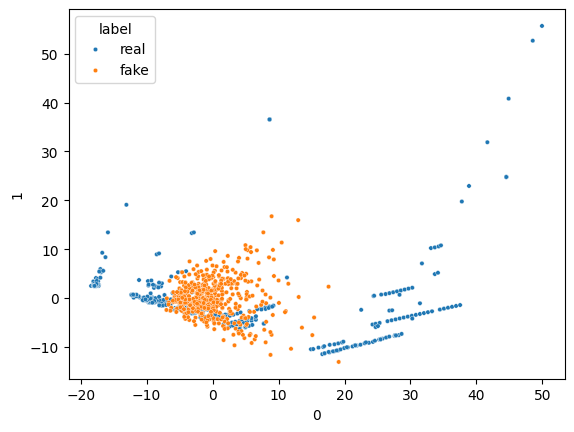

16/16 [==============================] - 0s 2ms/step


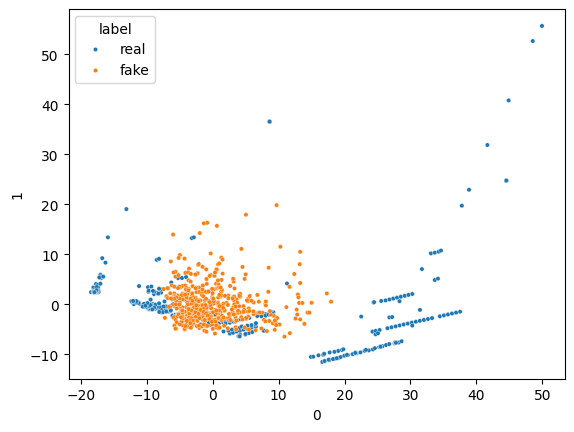

16/16 [==============================] - 0s 2ms/step


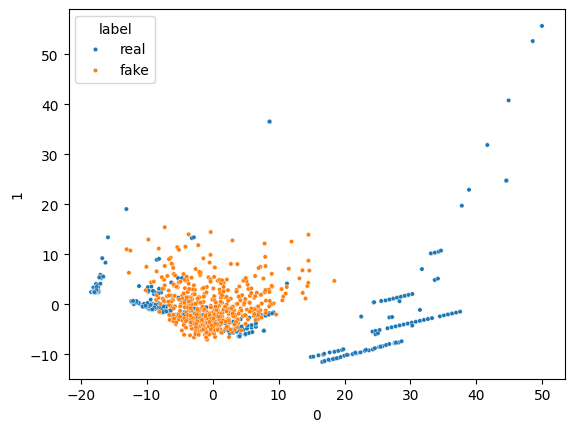

16/16 [==============================] - 0s 3ms/step


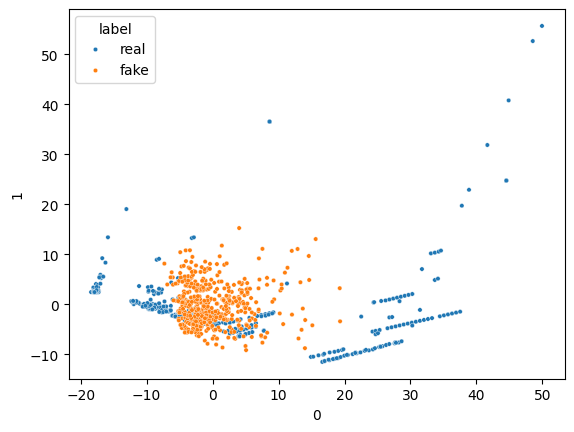

16/16 [==============================] - 0s 3ms/step


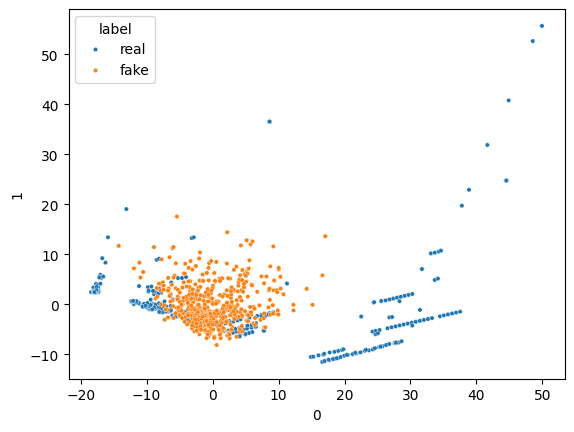

16/16 [==============================] - 0s 2ms/step


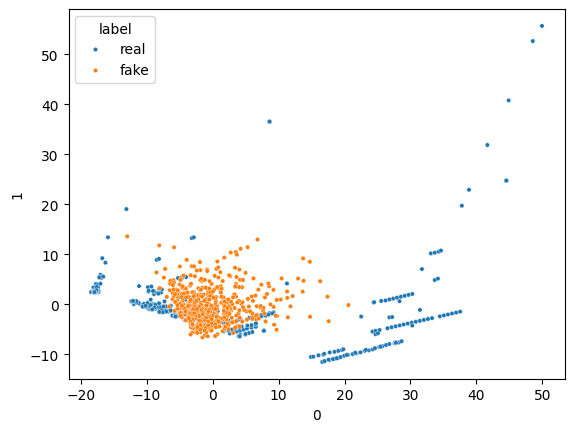

16/16 [==============================] - 0s 3ms/step


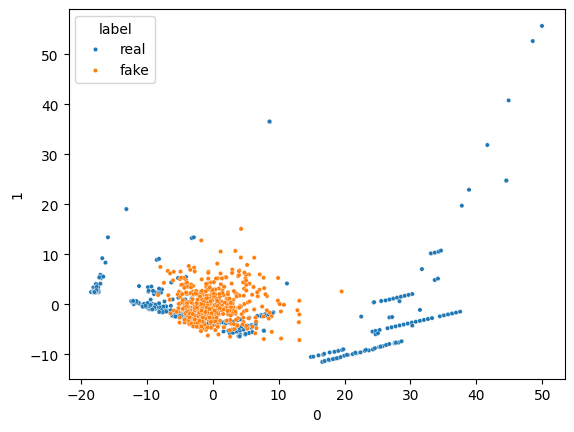

16/16 [==============================] - 0s 2ms/step


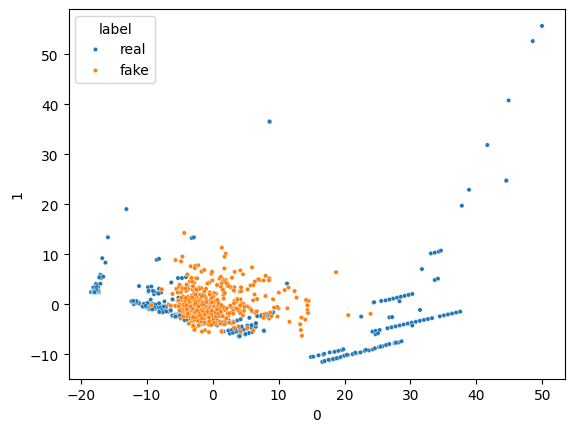

16/16 [==============================] - 0s 3ms/step


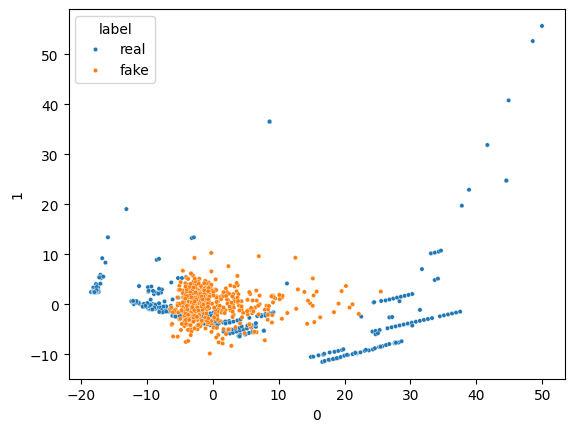

16/16 [==============================] - 0s 3ms/step


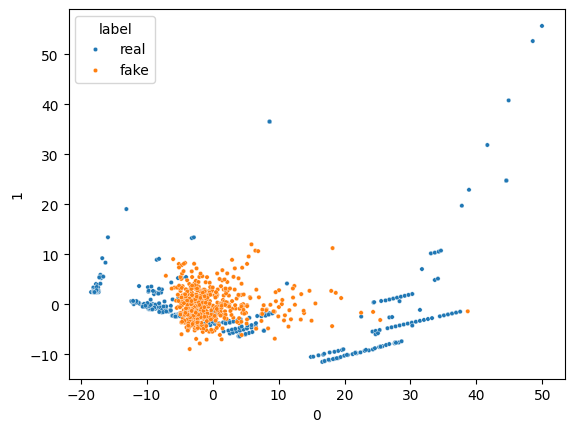

16/16 [==============================] - 0s 3ms/step


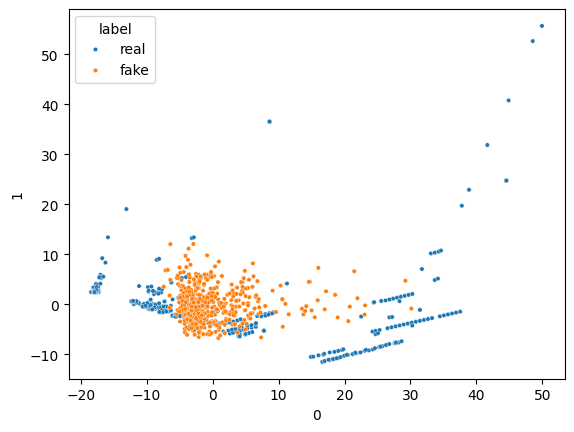

16/16 [==============================] - 0s 3ms/step


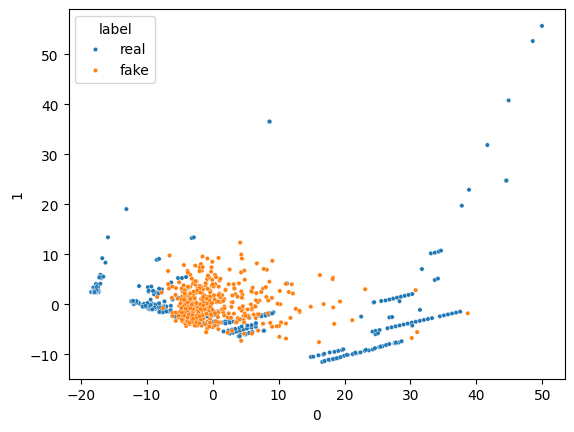

16/16 [==============================] - 0s 3ms/step


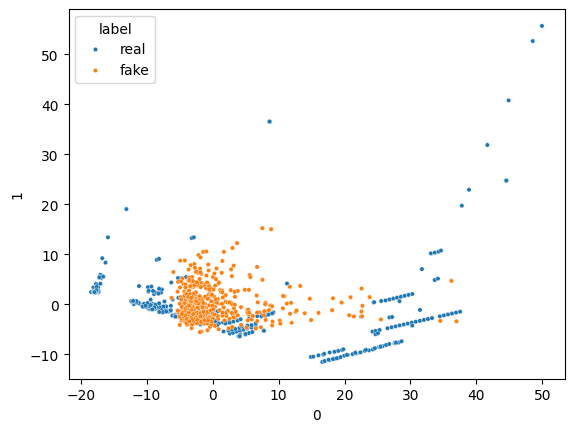

16/16 [==============================] - 0s 2ms/step


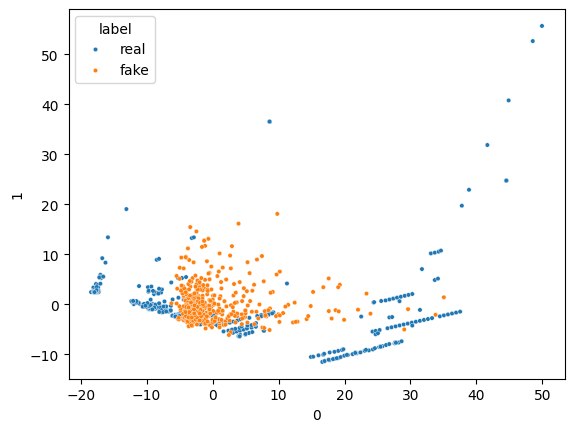

16/16 [==============================] - 0s 4ms/step


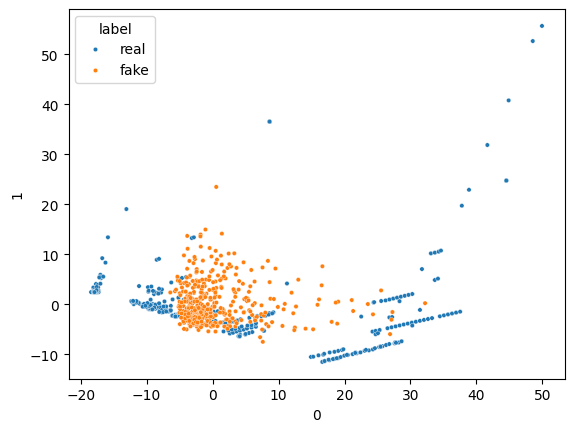

16/16 [==============================] - 0s 4ms/step


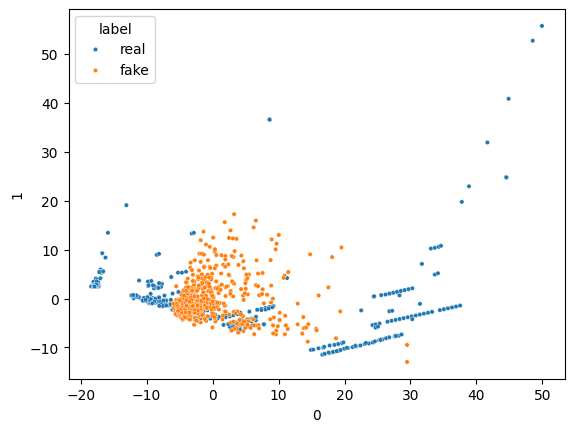

16/16 [==============================] - 0s 2ms/step


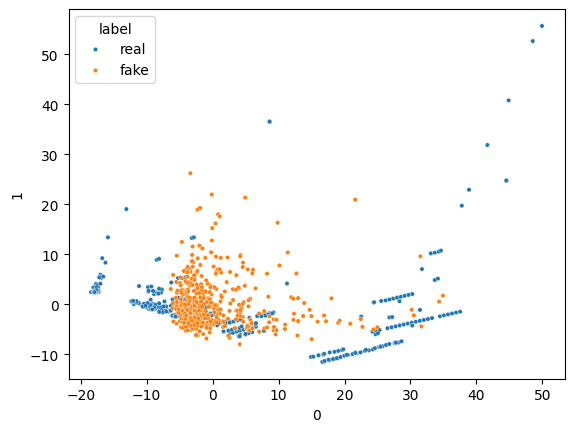

16/16 [==============================] - 0s 2ms/step


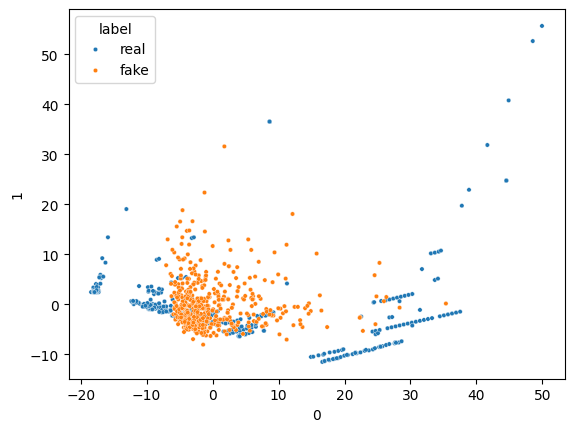

16/16 [==============================] - 0s 3ms/step


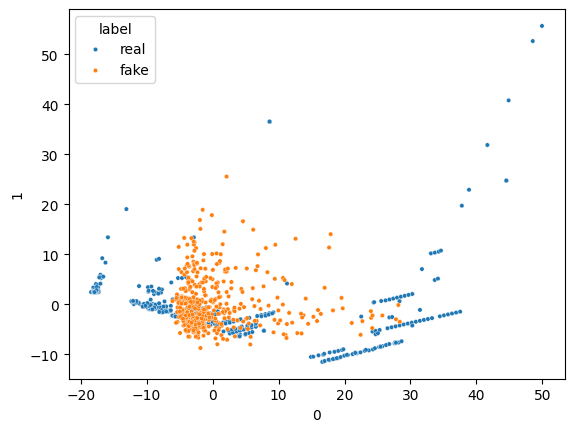

16/16 [==============================] - 0s 3ms/step


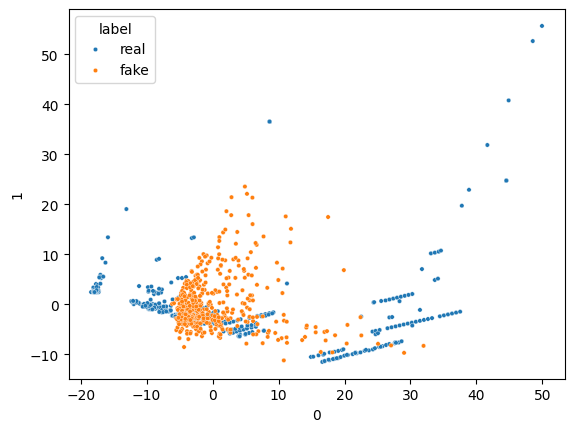

16/16 [==============================] - 0s 5ms/step


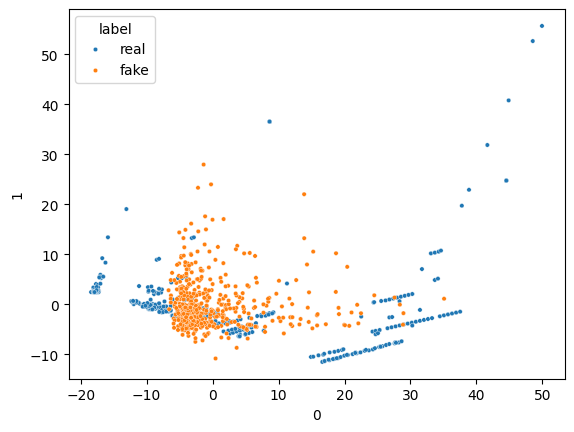

16/16 [==============================] - 0s 3ms/step


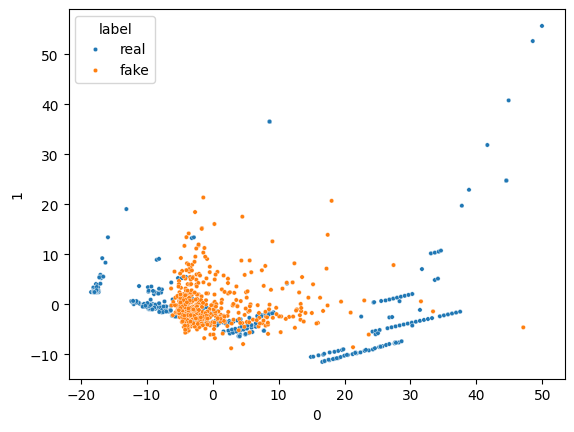

16/16 [==============================] - 0s 3ms/step


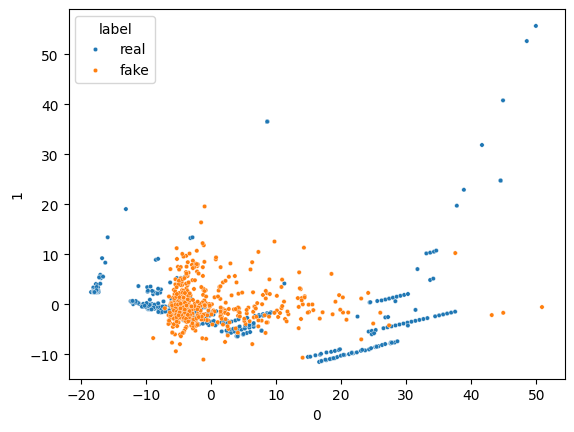

16/16 [==============================] - 0s 2ms/step


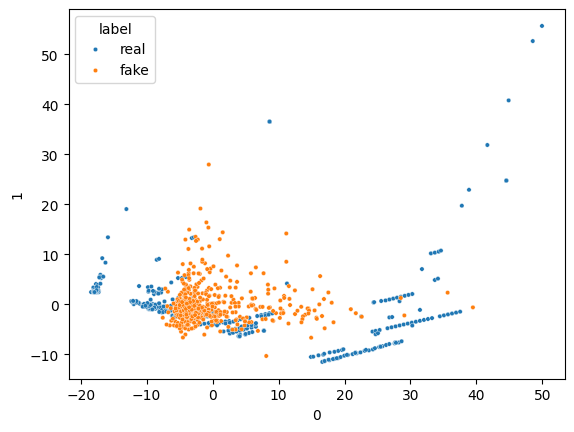

16/16 [==============================] - 0s 3ms/step


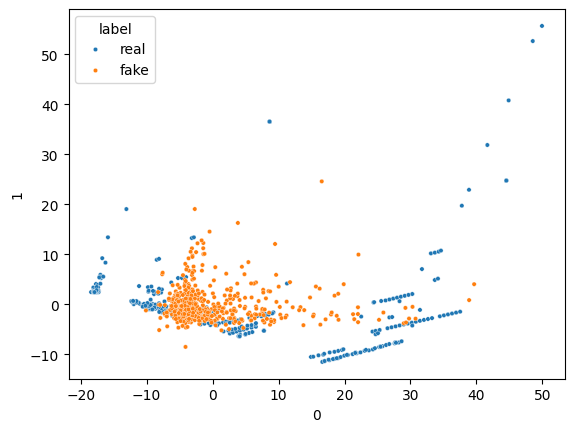

16/16 [==============================] - 0s 3ms/step


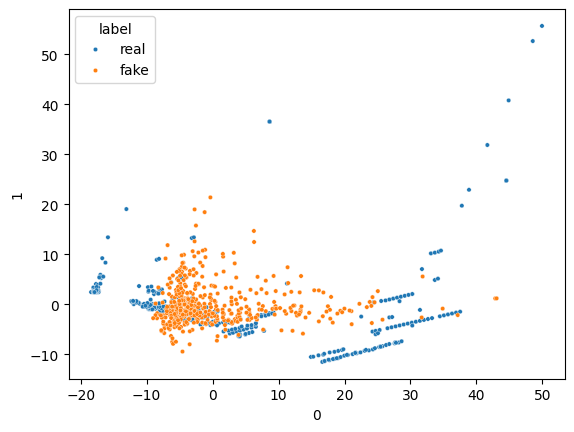

16/16 [==============================] - 0s 4ms/step


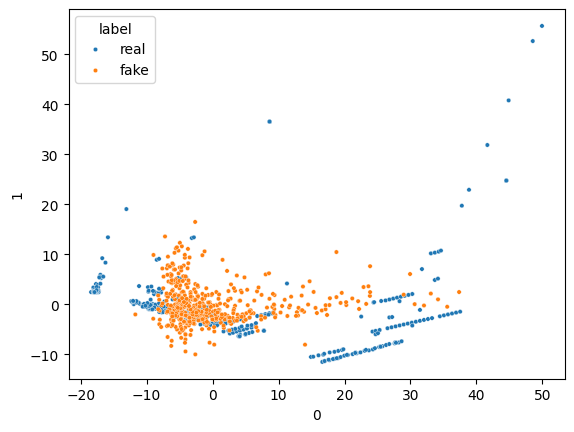

16/16 [==============================] - 0s 3ms/step


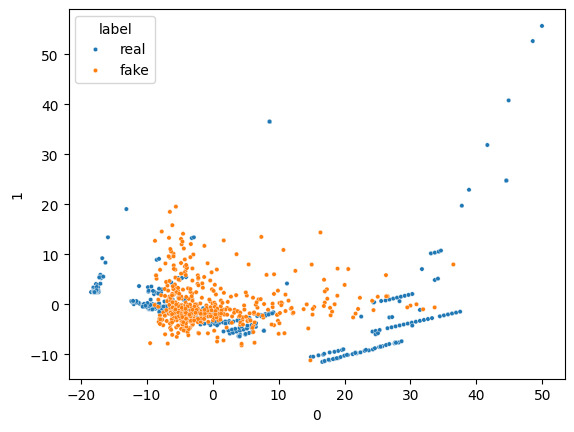

16/16 [==============================] - 0s 5ms/step


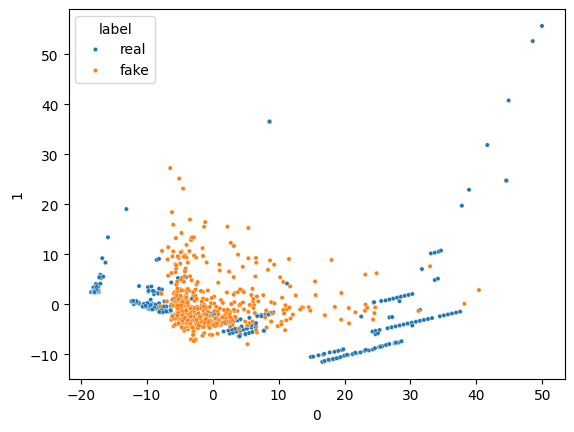

16/16 [==============================] - 0s 2ms/step


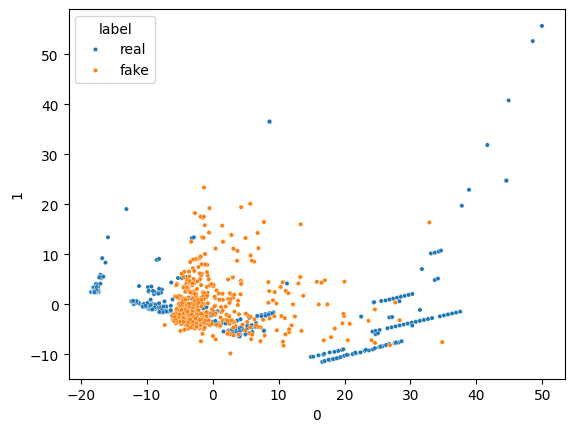

16/16 [==============================] - 0s 3ms/step


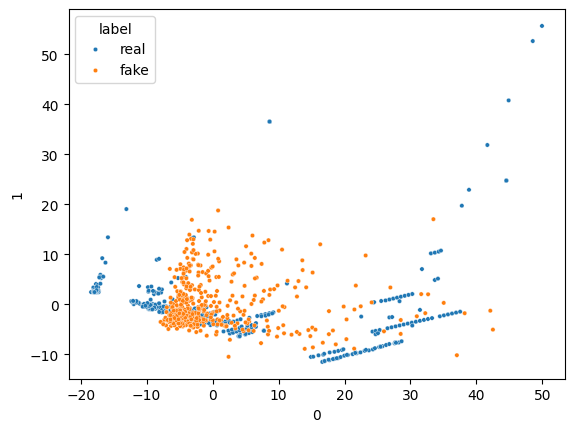

16/16 [==============================] - 0s 3ms/step


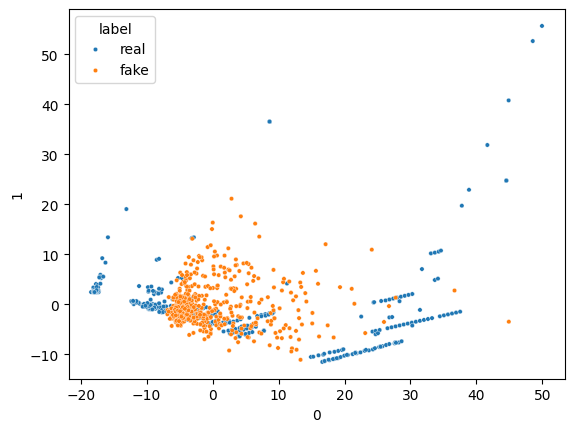

16/16 [==============================] - 0s 2ms/step


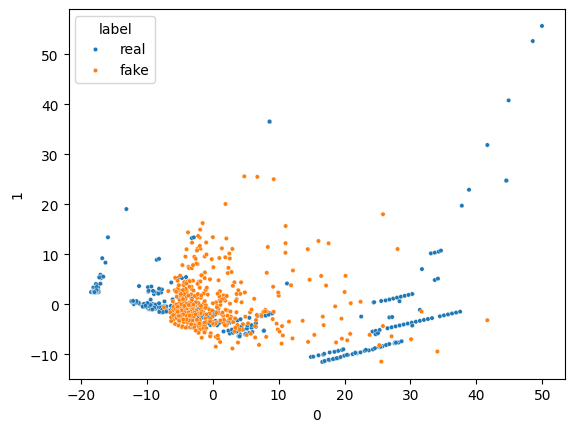

16/16 [==============================] - 0s 3ms/step


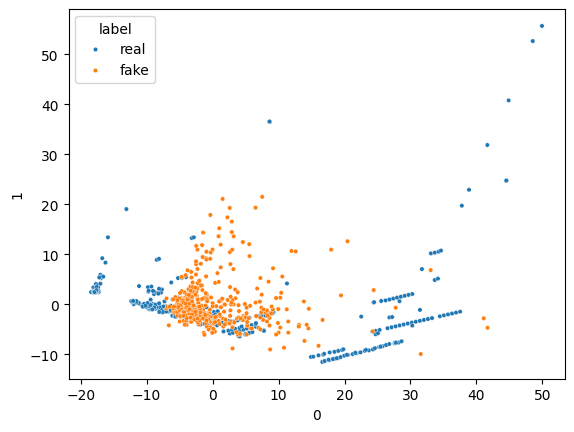

16/16 [==============================] - 0s 3ms/step


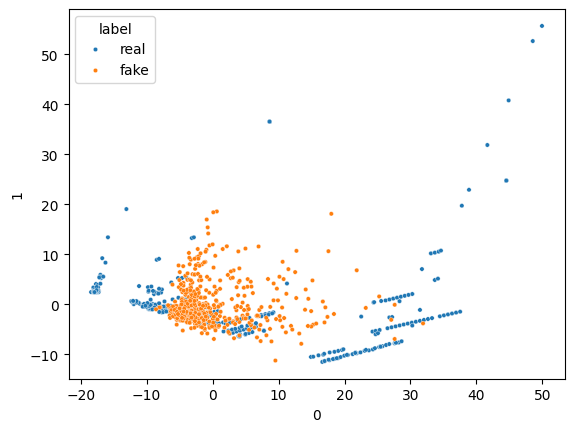

16/16 [==============================] - 0s 4ms/step


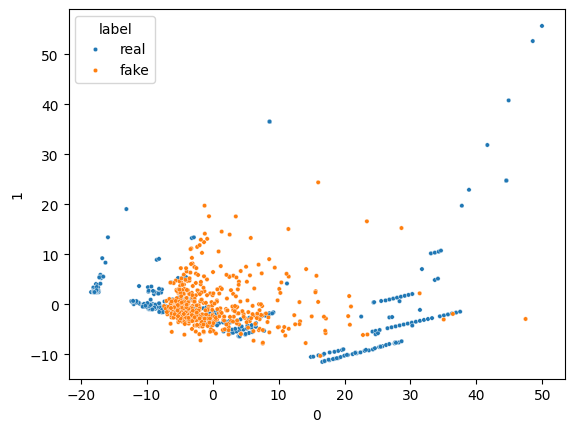

16/16 [==============================] - 0s 4ms/step


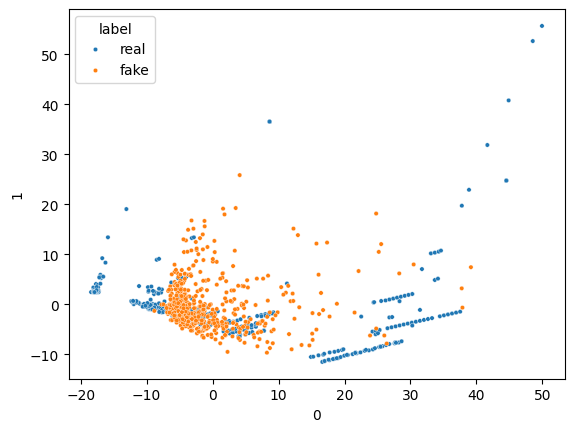

16/16 [==============================] - 0s 3ms/step


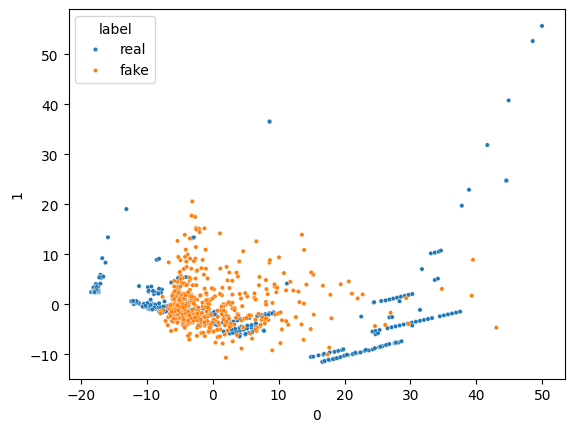

16/16 [==============================] - 0s 3ms/step


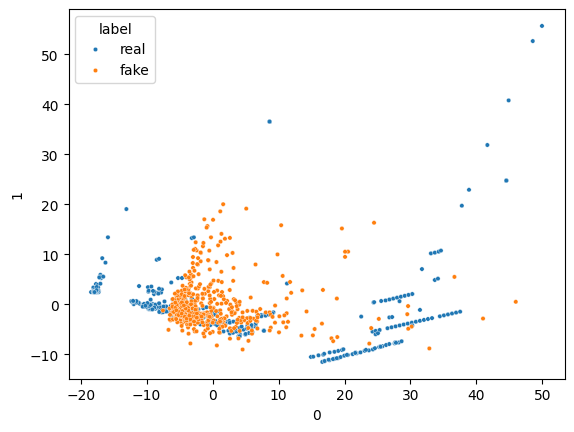

16/16 [==============================] - 0s 2ms/step


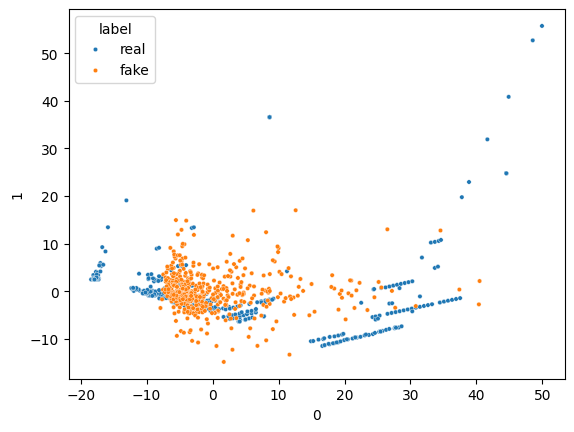

16/16 [==============================] - 0s 2ms/step


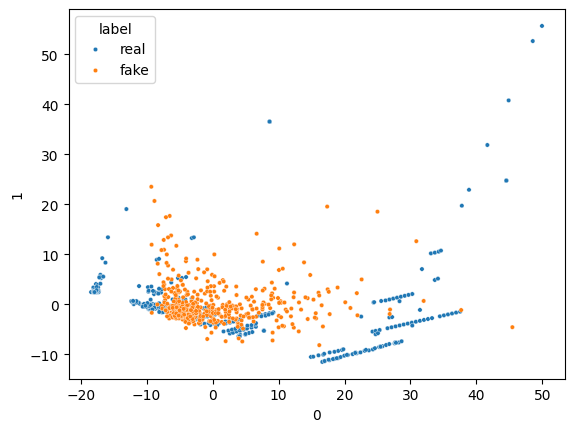

16/16 [==============================] - 0s 4ms/step


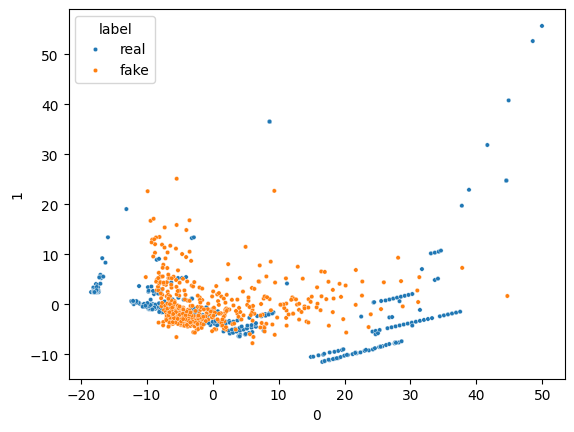

16/16 [==============================] - 0s 2ms/step


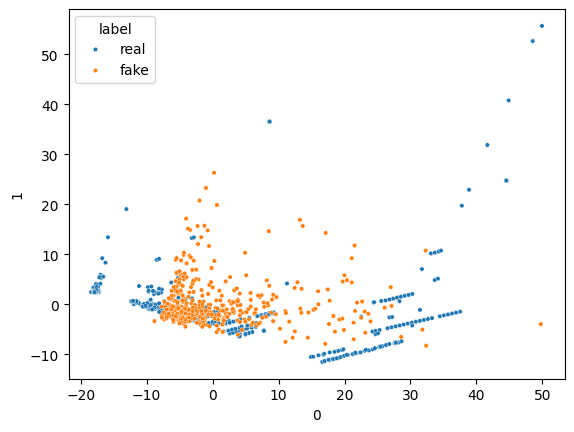

16/16 [==============================] - 0s 2ms/step


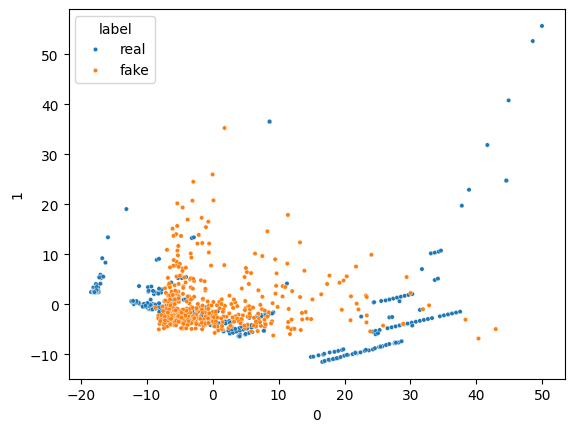

16/16 [==============================] - 0s 4ms/step


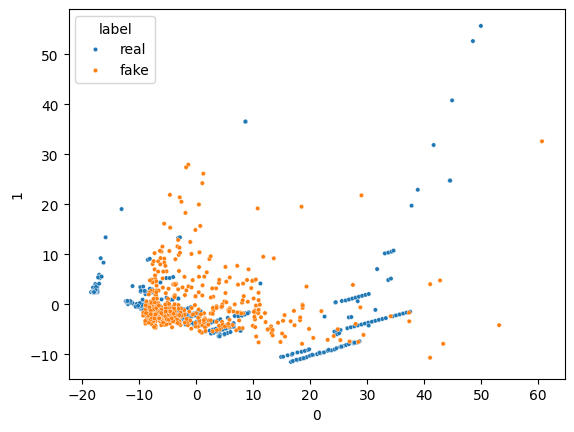

16/16 [==============================] - 0s 2ms/step


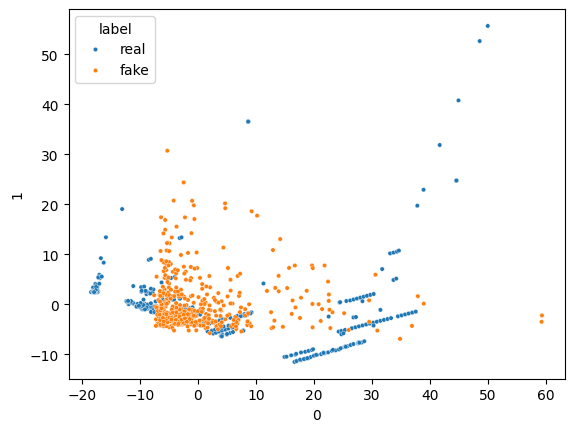

16/16 [==============================] - 0s 2ms/step


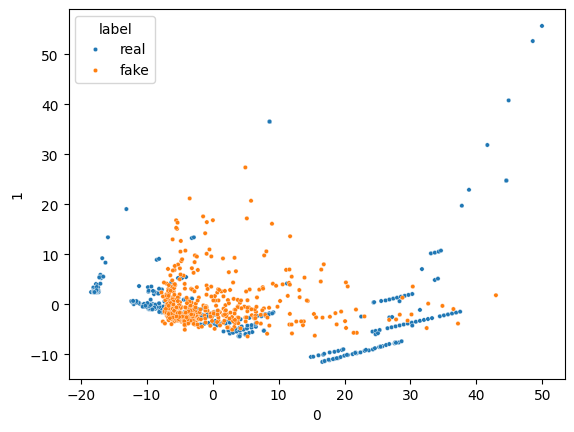

16/16 [==============================] - 0s 2ms/step


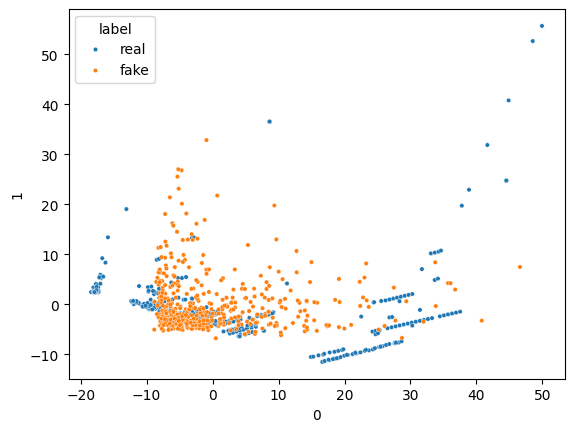

16/16 [==============================] - 0s 4ms/step


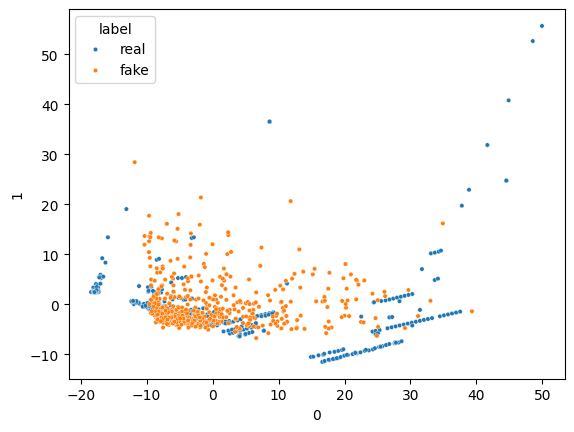

16/16 [==============================] - 0s 2ms/step


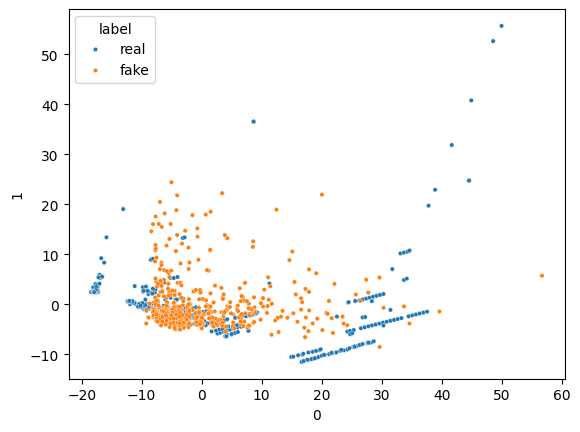

16/16 [==============================] - 0s 2ms/step


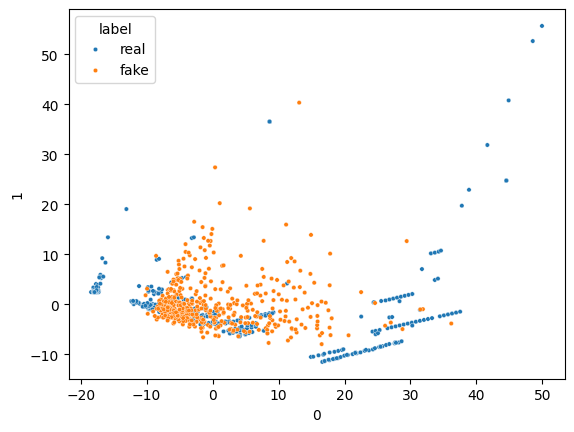

16/16 [==============================] - 0s 3ms/step


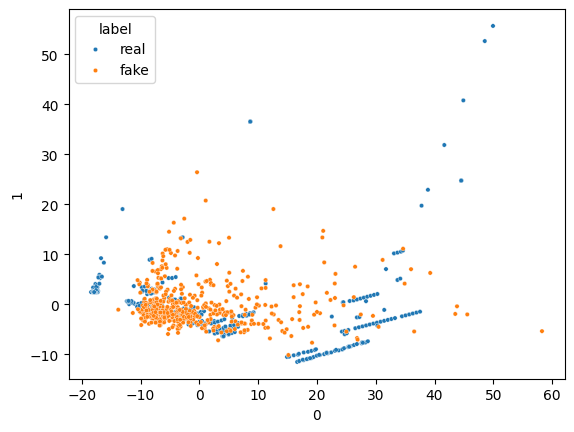

16/16 [==============================] - 0s 2ms/step


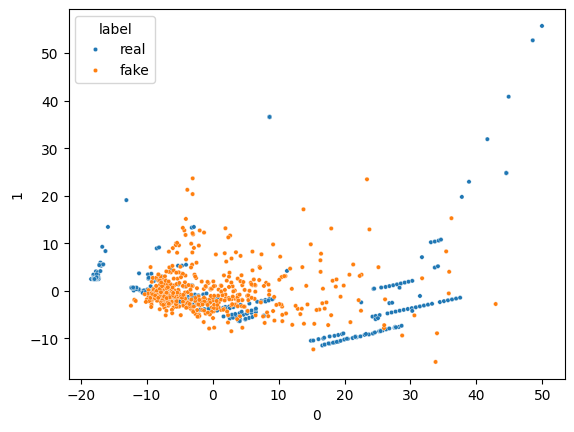

16/16 [==============================] - 0s 2ms/step


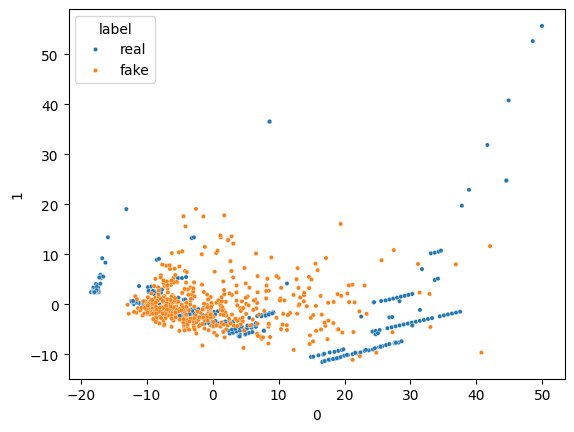

16/16 [==============================] - 0s 3ms/step


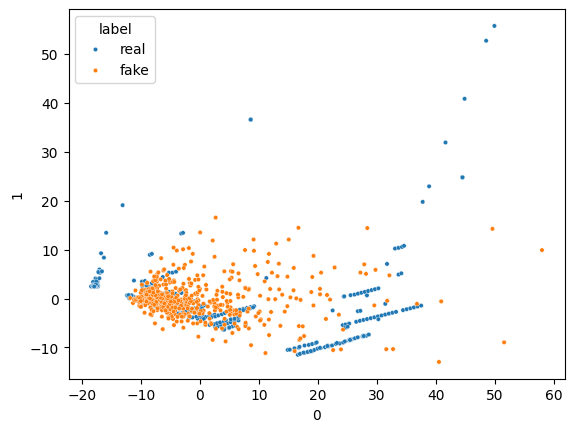

16/16 [==============================] - 0s 2ms/step


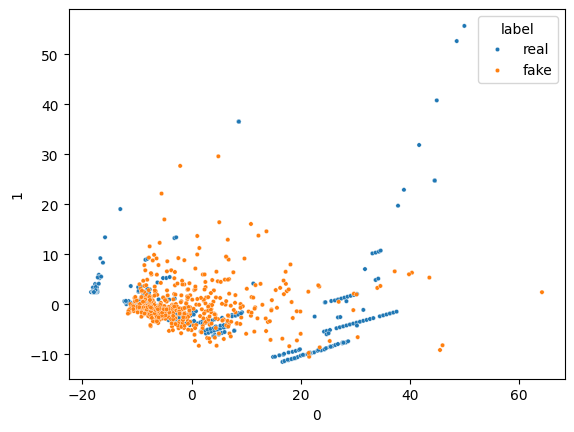

16/16 [==============================] - 0s 3ms/step


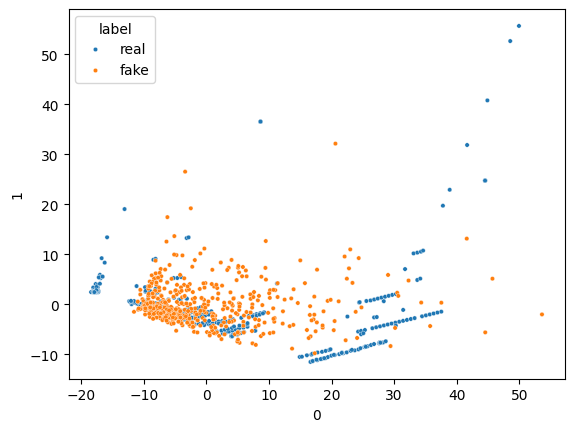

16/16 [==============================] - 0s 3ms/step


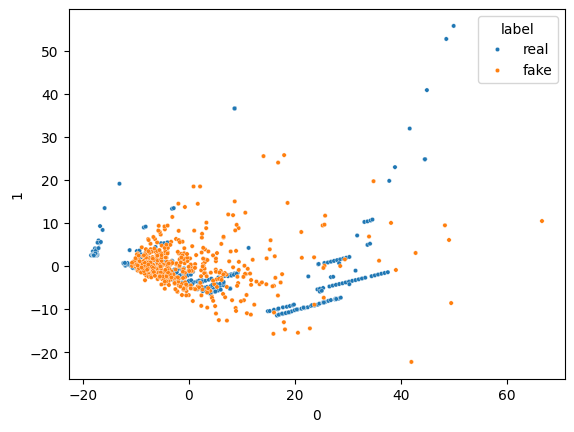

16/16 [==============================] - 0s 2ms/step


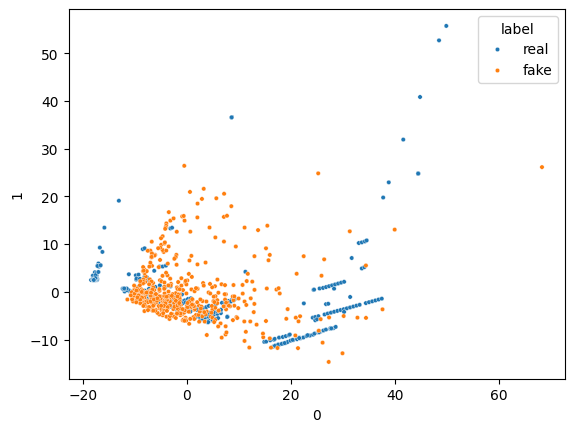

16/16 [==============================] - 0s 2ms/step


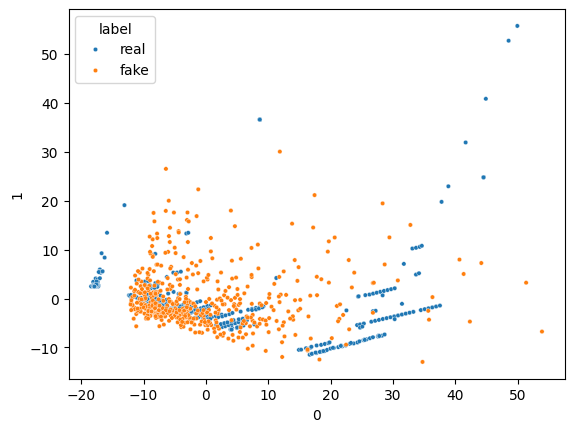

16/16 [==============================] - 0s 2ms/step


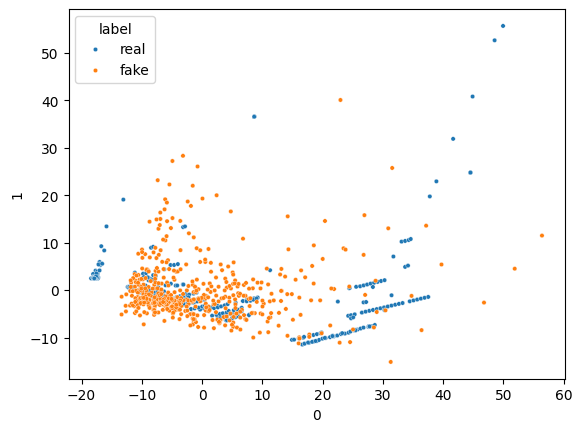

16/16 [==============================] - 0s 3ms/step


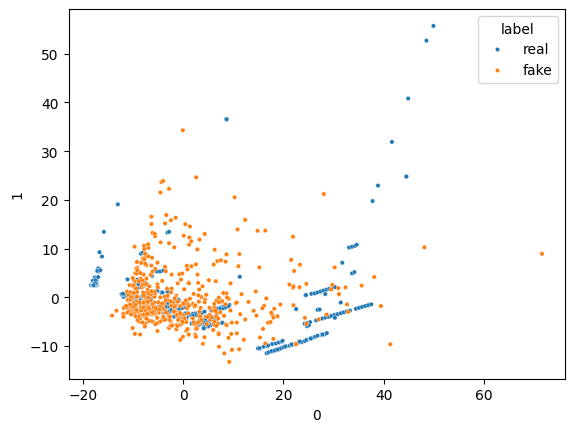

16/16 [==============================] - 0s 2ms/step


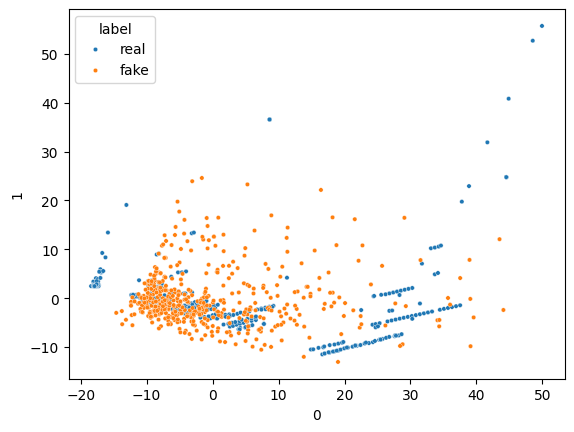

16/16 [==============================] - 0s 3ms/step


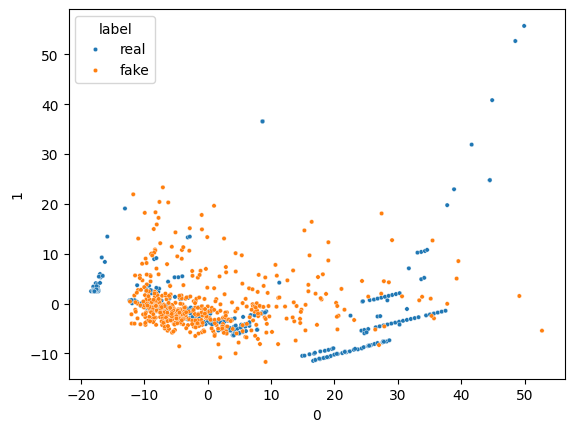

16/16 [==============================] - 0s 3ms/step


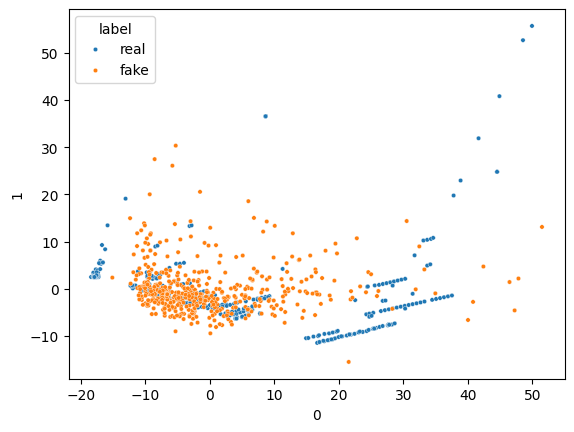

16/16 [==============================] - 0s 3ms/step


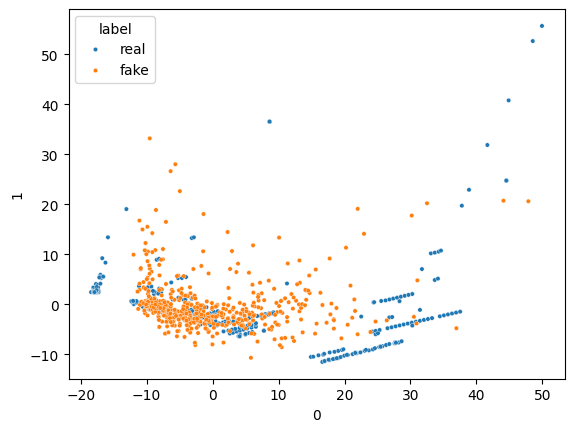

16/16 [==============================] - 0s 2ms/step


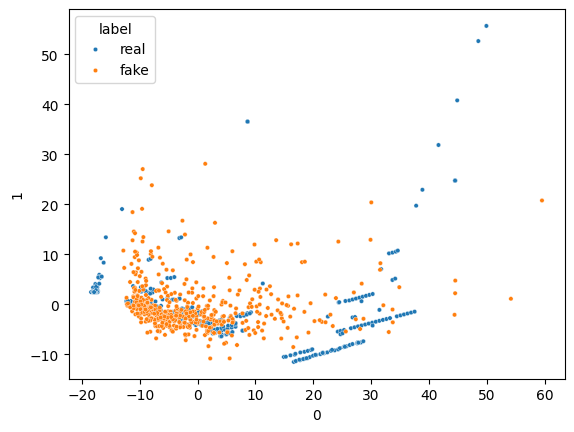

16/16 [==============================] - 0s 2ms/step


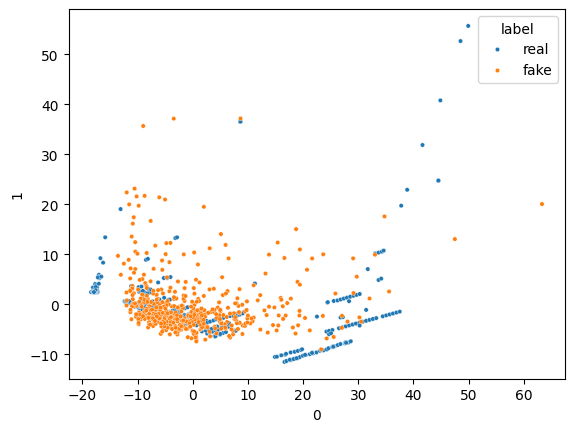

16/16 [==============================] - 0s 3ms/step


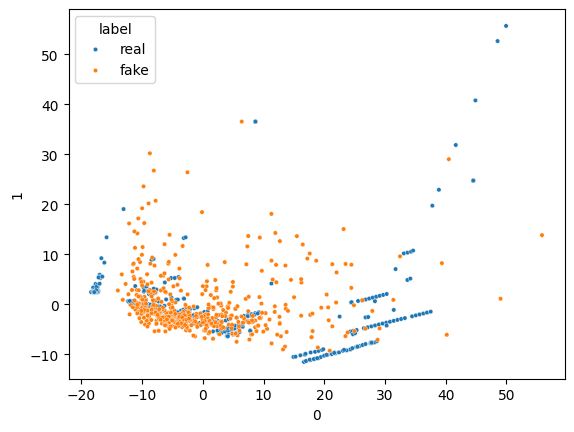

16/16 [==============================] - 0s 2ms/step


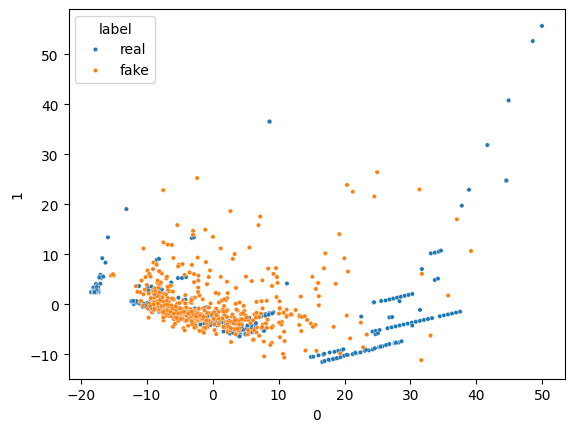

16/16 [==============================] - 0s 2ms/step


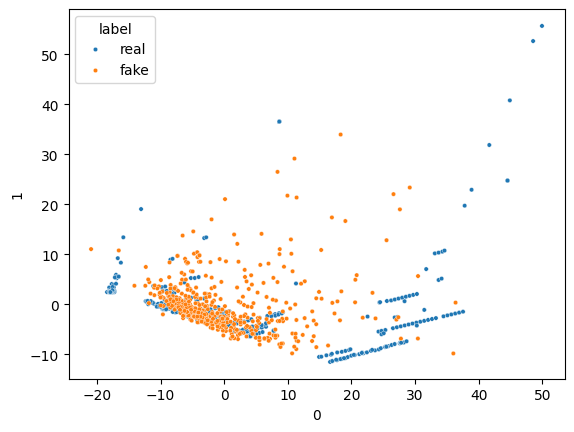

16/16 [==============================] - 0s 4ms/step


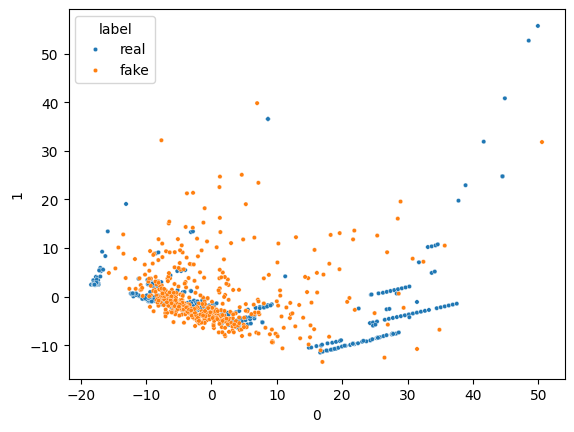

16/16 [==============================] - 0s 2ms/step


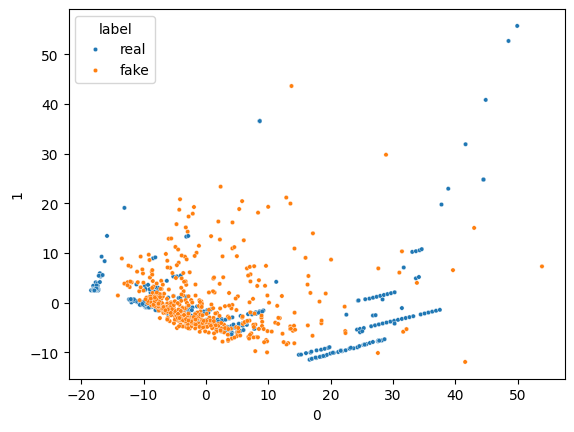

16/16 [==============================] - 0s 2ms/step


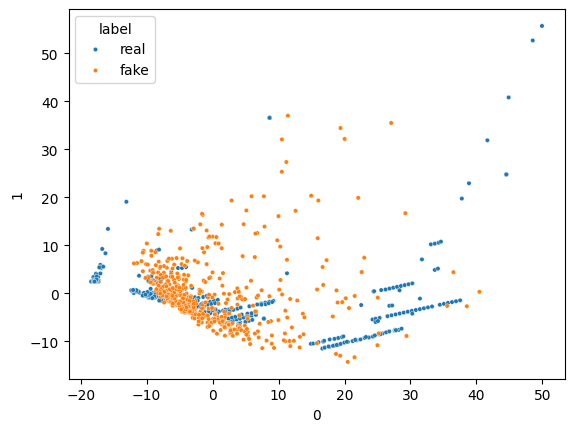

16/16 [==============================] - 0s 2ms/step


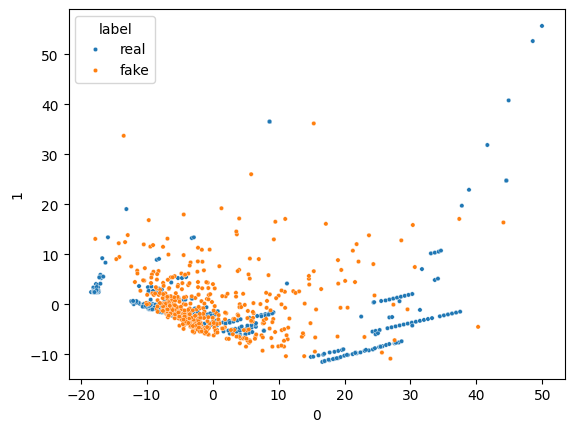

16/16 [==============================] - 0s 2ms/step


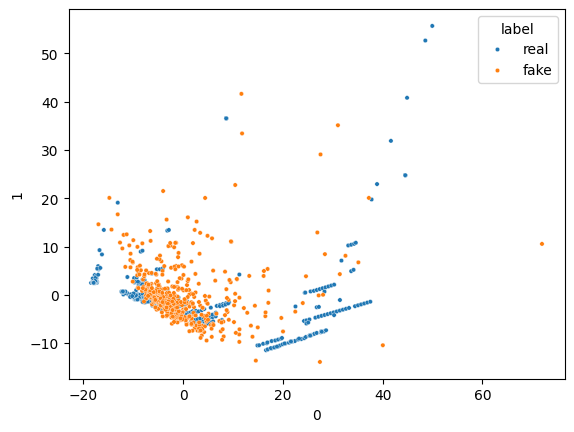

16/16 [==============================] - 0s 2ms/step


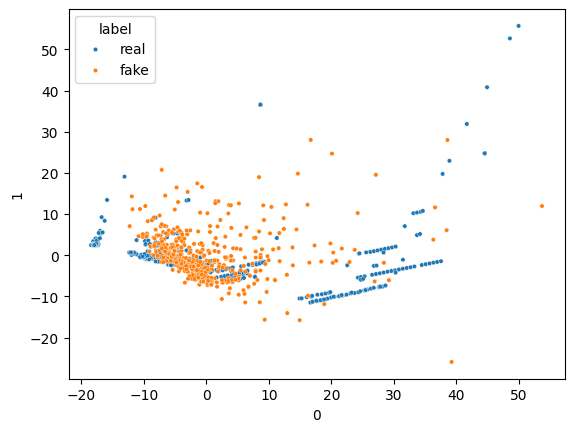

16/16 [==============================] - 0s 3ms/step


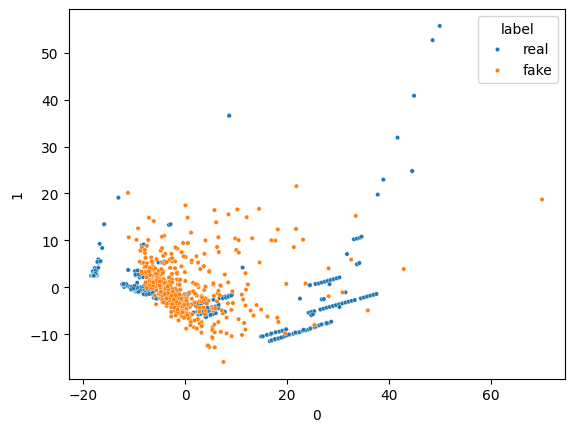

16/16 [==============================] - 0s 2ms/step


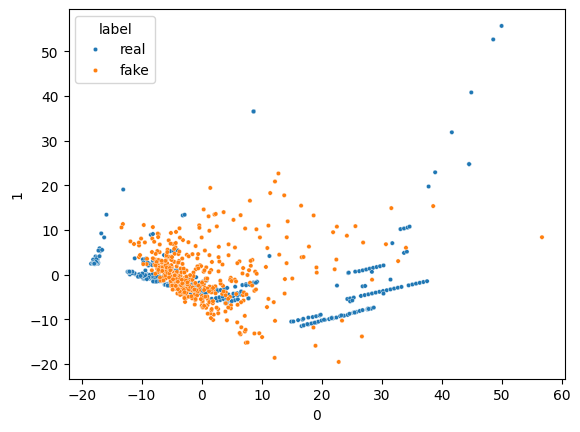

16/16 [==============================] - 0s 2ms/step


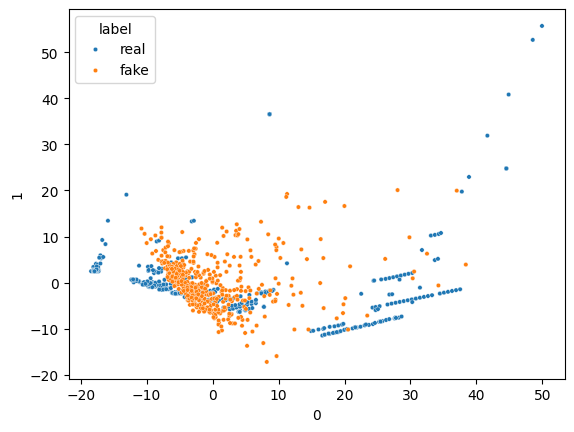

16/16 [==============================] - 0s 2ms/step


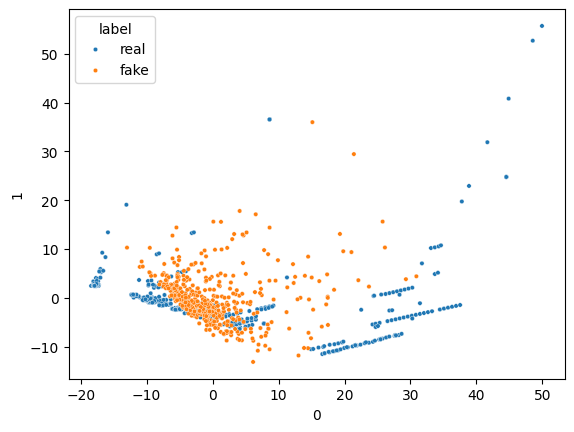

16/16 [==============================] - 0s 4ms/step


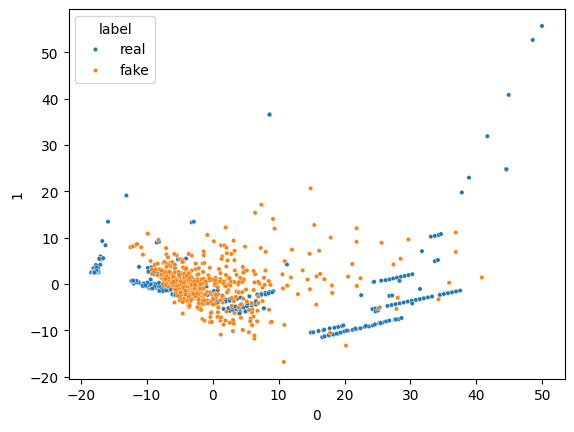

16/16 [==============================] - 0s 3ms/step


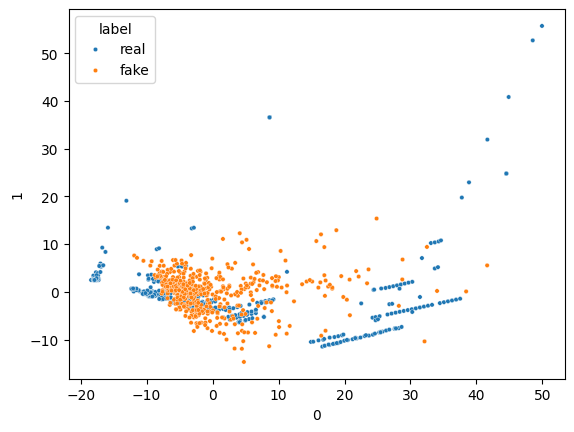

16/16 [==============================] - 0s 3ms/step


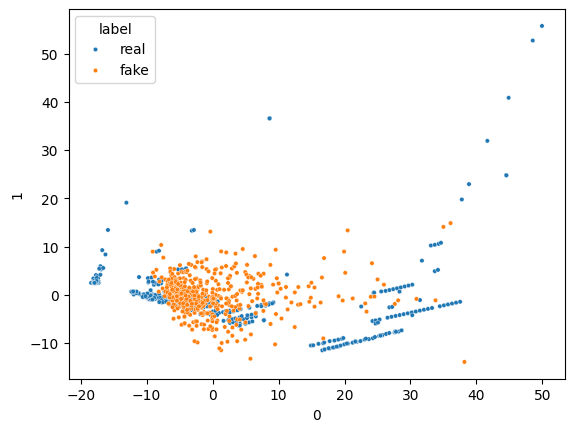

1/1 [==============================] - 0s 25ms/step


In [ ]:
generator = build_generator()
discriminator = build_discriminator()

gan = build_gan(generator, discriminator)

gan.compile(optimizer= 'Adam', loss = 'binary_crossentropy')

num_epochs = 1000
batch_size = 64
half_batch = int(batch_size/2)

#train loop
for epoch in range(num_epochs):

  X_fake = generate_synthetic_data(generator, half_batch)
  y_fake = np.zeros((half_batch, 1))

  X_real = data_fraud.drop("Class", axis = 1).sample(half_batch)
  y_real = np.ones((half_batch, 1))

  discriminator.trainable = True

  discriminator.train_on_batch(X_real, y_real)
  discriminator.train_on_batch(X_fake, y_fake)

  noise = np.random.normal(0, 1, (batch_size, 29))
  gan.train_on_batch(noise, np.ones((batch_size, 1)))

  if epoch%10 == 0:
    monitor_generator(generator)


### Task 7 - Generate synthetic data using the trained Generator

*   Generate 1000 fradulent data points using the trained generator
*   Compare the distribution of `real` and `synthetic` fradulent data points.


In [ ]:
synthetic_data = generate_synthetic_data(generator, 1000)
df = pd.DataFrame(synthetic_data)

32/32 [==============================] - 0s 2ms/step


In [ ]:
df

0         1         2         3         4         5         6   \
0   -3.370968 -0.117461 -2.884327 -0.497113 -0.661493 -2.796614 -3.091403   
1   -4.235850  3.151900 -7.576274  5.070805 -3.960716 -2.146044 -5.566410   
2   -0.706114 -0.282941 -3.909081  2.468914 -2.654610 -0.899196 -2.494153   
3   -1.472368  0.658127 -3.957361 -0.117428 -2.472244 -1.423530 -3.654799   
4   -5.690603  1.205674 -7.395204  2.546454  4.216077 -5.476223 -4.611806   
..        ...       ...       ...       ...       ...       ...       ...   
995 -9.126267  2.129216 -7.555250  1.707015 -6.600602 -1.549656 -4.589000   
996 -1.066858  1.145926 -4.093235  1.833200 -2.697079 -0.588906 -3.341004   
997 -2.107911  1.932566 -4.773451  1.262153  1.783809 -3.451538 -2.252447   
998 -1.497480  5.628615 -7.881271  9.383837 -1.786794 -0.945532 -5.681978   
999 -4.841555  3.083849 -6.365812  2.917848 -4.832077  0.157687 -2.856837   

           7         8         9   ...        19        20        21  \
0    0.998393 -2.290656 -6.704118  ... -0.562078  0.402107 -0.364932   
1    0.987995 -1.517176 -5.431760  ... -1.098045  0.420242  0.194757   
2    0.841936 -3.025743 -4.270601  ...  1.194839  0.447238 -0.855140   
3    1.356689 -1.235746 -5.592441  ...  0.425310 -0.106956  0.307618   
4   -0.511724 -5.476092 -8.759718  ... -1.255064 -0.733492 -1.090430   
..        ...       ...       ...  ...       ...       ...       ...   
995  0.256003  1.434511 -4.579261  ... -2.174900  0.792733 -0.535361   
996  1.378394 -2.791734 -4.820846  ...  0.606162  0.288431 -0.427900   
997  0.624123 -2.756190 -5.685039  ... -0.804152 -0.612841  0.069392   
998  1.681884 -5.239826 -8.158505  ... -0.038565 -1.218151 -0.488763   
999 -0.029012 -1.063866 -3.508976  ... -0.883655  0.099457 -1.488288   

           22        23        24        25        26        27        28  
0   -1.767054  0.266273 -1.017271 -1.297574  1.173535  0.652867 -0.475670  
1   -0.749014 -0.629438  0.072914 -0.565807 -1.103141 -0.341510 -1.668239  
2    0.409606  0.115716 -0.030373 -0.401236  0.564017 -0.336679  1.353888  
3    0.036162 -0.529507 -0.234029 -0.051692  0.220746 -0.031882 -0.782995  
4   -2.463094 -0.204198 -1.773930 -1.939097  2.359699  1.238730 -0.764282  
..        ...       ...       ...       ...       ...       ...       ...  
995 -2.461123 -0.119216 -0.008876 -0.636443 -1.981429 -0.856634 -0.347198  
996  0.374433 -0.596280 -0.272477 -0.405435 -0.086777  0.109587 -0.124693  
997 -1.355689 -0.297958 -0.352353 -0.920084  1.221679  0.766623 -0.301374  
998  0.721806 -1.408754  0.098312  0.111402  1.041091 -0.181923 -0.270863  
999 -0.528110 -0.630737 -0.050063 -0.493094 -1.207090 -0.215551  0.456474  

[1000 rows x 29 columns]

In [ ]:
df['label']='fake'
df2 = data_fraud.drop('Class', axis = 1)
df2['label'] = 'real'
df2.columns = df.columns

combined_df = pd.concat([df,df2])

In [ ]:
combined_df

0         1         2         3         4         5         6  \
0     -3.370968 -0.117461 -2.884327 -0.497113 -0.661493 -2.796614 -3.091403   
1     -4.235850  3.151900 -7.576274  5.070805 -3.960716 -2.146044 -5.566410   
2     -0.706114 -0.282941 -3.909081  2.468914 -2.654610 -0.899196 -2.494153   
3     -1.472368  0.658127 -3.957361 -0.117428 -2.472244 -1.423530 -3.654799   
4     -5.690603  1.205674 -7.395204  2.546454  4.216077 -5.476223 -4.611806   
...         ...       ...       ...       ...       ...       ...       ...   
50487 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
50488  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
50489 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
50490 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
50491  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              7         8         9  ...        20        21        22  \
0      0.998393 -2.290656 -6.704118  ...  0.402107 -0.364932 -1.767054   
1      0.987995 -1.517176 -5.431760  ...  0.420242  0.194757 -0.749014   
2      0.841936 -3.025743 -4.270601  ...  0.447238 -0.855140  0.409606   
3      1.356689 -1.235746 -5.592441  ... -0.106956  0.307618  0.036162   
4     -0.511724 -5.476092 -8.759718  ... -0.733492 -1.090430 -2.463094   
...         ...       ...       ...  ...       ...       ...       ...   
50487  0.697211 -2.064945 -5.587794  ...  0.778584 -0.319189  0.639419   
50488  0.248525 -1.127396 -3.232153  ...  0.370612  0.028234 -0.145640   
50489  1.210158 -0.652250 -3.463891  ...  0.751826  0.834108  0.190944   
50490  1.058733 -1.632333 -5.245984  ...  0.583276 -0.269209 -0.456108   
50491 -0.068384  0.577829 -0.888722  ... -0.164350 -0.295135 -0.072173   

             23        24        25        26        27        28  label  
0      0.266273 -1.017271 -1.297574  1.173535  0.652867 -0.475670   fake  
1     -0.629438  0.072914 -0.565807 -1.103141 -0.341510 -1.668239   fake  
2      0.115716 -0.030373 -0.401236  0.564017 -0.336679  1.353888   fake  
3     -0.529507 -0.234029 -0.051692  0.220746 -0.031882 -0.782995   fake  
4     -0.204198 -1.773930 -1.939097  2.359699  1.238730 -0.764282   fake  
...         ...       ...       ...       ...       ...       ...    ...  
50487 -0.294885  0.537503  0.788395  0.292680  0.147968  1.277825   real  
50488 -0.081049  0.521875  0.739467  0.389152  0.186637 -0.369281   real  
50489  0.032070 -0.739695  0.471111  0.385107  0.194361 -0.042898   real  
50490 -0.183659 -0.328168  0.606116  0.884876 -0.253700  0.664244   real  
50491 -0.450261  0.313267 -0.289617  0.002988 -0.015309 -0.192527   real  

[1492 rows x 30 columns]

Checking the individual feature distribution of `synthetic` and `real` fraud data.

In [ ]:
for col in combined_df.columns:
  plt.figure()
  fig = px.histogram(combined_df, color = 'label', x=col,barmode="overlay", title = f'Feature {col}', width = 640, height = 500)
  fig.show()

<ipython-input-24-7712b9dc83b8>:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>